In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('whitegrid')

In [2]:
netflix_df = pd.read_csv('../Data/netflix_titles.csv')

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix_df.shape

(7787, 12)

In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


## Data cleaning and transformation

In [7]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
netflix_df['director'] = netflix_df['director'].fillna("Unknown")
netflix_df['cast'] = netflix_df['cast'].fillna("Unknown")

In [9]:
mode_country = netflix_df['country'].mode()[0]
mode_country

'United States'

In [10]:
netflix_df['country'] = netflix_df['country'].fillna(mode_country)

In [11]:
netflix_df.dropna(subset=['date_added', 'rating'], inplace = True)

In [12]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [13]:
netflix_df['date_added']

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7782      October 19, 2020
7783         March 2, 2019
7784    September 25, 2020
7785      October 31, 2020
7786         March 1, 2020
Name: date_added, Length: 7770, dtype: object

In [14]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format = 'mixed', dayfirst= False)

In [15]:
netflix_df['date_added']

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7770, dtype: datetime64[ns]

In [16]:
netflix_df['year_added'] = netflix_df['date_added'].dt.year

In [17]:
netflix_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020


In [18]:
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [19]:
netflix_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8


## Exploratory Data Analysis & Visualization

Q. What is the distribution of content type?

In [ ]:
plt.figure(figsize = (8,6))

Q. How has content being added over the years?

In [22]:
content_added_over_time = netflix_df.groupby(['year_added', 'type']).size().unstack().fillna(0)
content_added_over_time

type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,0.0
2010,1.0,0.0
2011,13.0,0.0
2012,3.0,0.0
2013,6.0,5.0
2014,19.0,6.0
2015,58.0,30.0
2016,256.0,184.0


<Figure size 1400x800 with 0 Axes>

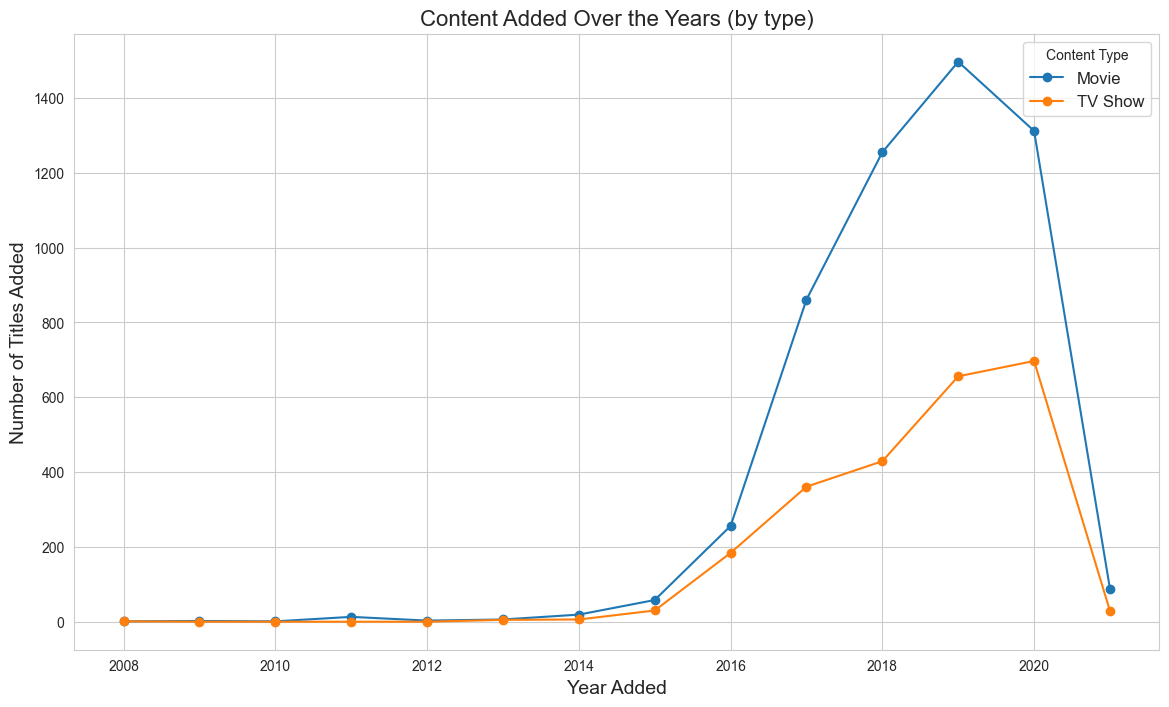

In [23]:
plt.figure(figsize = (14,8))
content_added_over_time.plot(kind='line', marker = 'o', figsize = (14,8))
plt.title('Content Added Over the Years (by type)', fontsize = 16)
plt.xlabel('Year Added', fontsize = 14)
plt.ylabel('Number of Titles Added', fontsize = 14)
plt.legend(title = 'Content Type', fontsize = 12)
plt.grid(True)
plt.show()


Q. What are the most popular genres?

In [25]:
genres = netflix_df.assign(genre = netflix_df['listed_in'].str.split(', ')).explode('genre')
# genres

In [28]:
top_genres_count = genres['genre'].value_counts().reset_index()
top_genres_count.columns = ['genre', 'count']
# top_genres_count

/var/folders/fz/c_tklfjd1tsc9y8_vtcmzyrr0000gn/T/ipykernel_409/644061309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'count', y = 'genre', data = top_15_genre, palette = 'viridis')


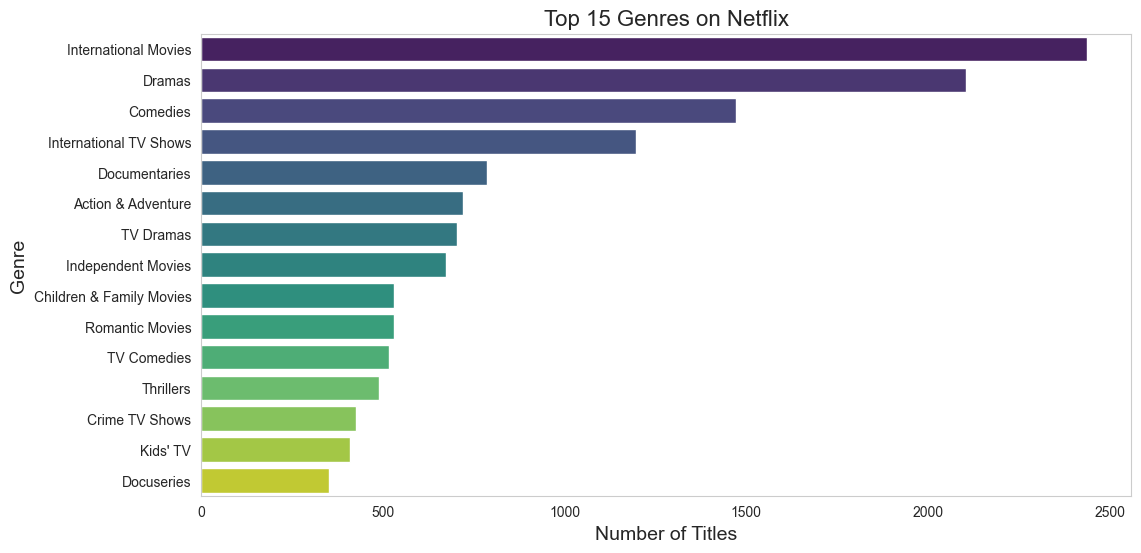

In [31]:
top_15_genre = top_genres_count.head(15)
plt.figure(figsize = (12,6))
sns.barplot(x = 'count', y = 'genre', data = top_15_genre, palette = 'viridis')
plt.title('Top 15 Genres on Netflix', fontsize = 16)
plt.xlabel('Number of Titles', fontsize = 14)
plt.ylabel('Genre', fontsize = 14)
plt.grid(axis = 'x')
plt.show()


Q. What is the distribution ofcontent duration?

In [32]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [35]:
# netflix_df[netflix_df['type'] == 'Movie']

In [36]:
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()

In [38]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

In [41]:
# movies_df.head()
# tv_shows_df.head()

<Axes: xlabel='seasons', ylabel='Count'>

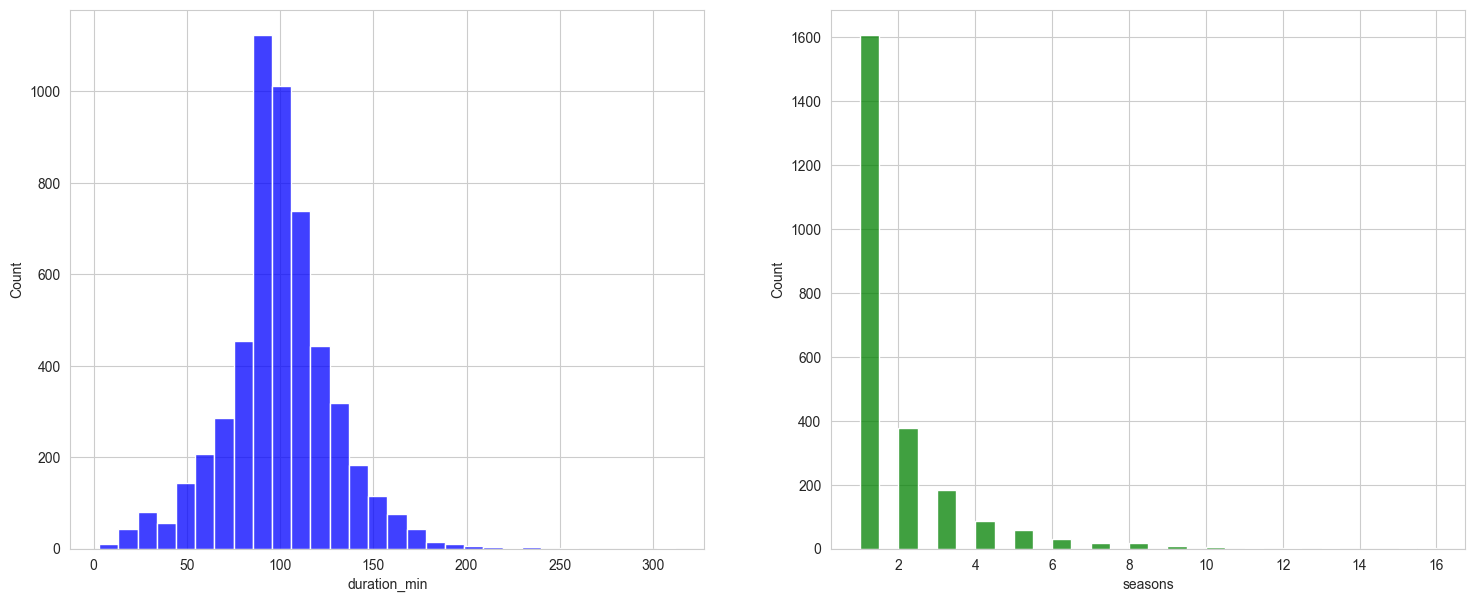

In [42]:
# Plot the distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.histplot(movies_df['duration_min'], bins=30, ax=axes[0], color='blue')
sns.histplot(tv_shows_df['seasons'], bins=30, ax=axes[1], color='green')

Q. Where does the content come from? (Geographyical Analysis)

In [45]:
countries = netflix_df.assign(country = netflix_df['country'].str.split(', ')).explode('country')
countries

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,United Kingdom,2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,Canada,2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3


In [46]:
top_15_countries = countries['country'].value_counts().reset_index()
top_15_countries.columns = ['country', 'count']
top_15_countries

,country,count
0,United States,3792
1,India,990
2,United Kingdom,721
3,Canada,412
4,France,349
...,...,...
116,Dominican Republic,1
117,Samoa,1
118,Azerbaijan,1
119,Bermuda,1


In [ ]:
top_countries_counts_plot = 

Q. What are the maturity ratings of the content?

## Feature Engineering

## Deeper Multivariate Analysis